# Multiple Linear Regression

## Bike Sharing Case Study

### Problem Statement

A Bike sharing company that has a dataset containing the bike information of American market. It wishes to use the data to increase the revenue based on important factors in the dataset.

Essentially, the company wants —

    To understand the factors affecting the demand for these shared bikes in the American market
    
    Which variables are significant in predicting the demand for shared bikes
    
    How well those variables describe the bike demands

**So interpretation is important!**

### Data Definition:

Key columns used from the Loans dataset used in this case study:
 - instant: record index
 - dteday : date
 - season - season (1:spring, 2:summer, 3:fall, 4:winter)
 - yr - year (0: 2018, 1:2019)
 - mnth - represented in numbers from 1 to 12
 - holiday - If the day is holiday then its 1 and not a holiday represented as 0
 - weekday - Its from 0 to 6 (0 - Sunday, 1- Monday and etc)
 - workingday - If the day is workingday then its 1 and not a workingday represented as 0
 - weathersit - 
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - temp - temperature in Celsius
 - atemp - feeling temperature in Celsius
 - hum - humidity
 - windspeed: wind speed
 - registered: count of registered users
 - cnt: count of total rental bikes including both casual and registered

## Step 1: Reading Data

In [84]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### First load all the necessary libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel for model building
import statsmodels.api as sm

# Importing VIF to calculate the VIF for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Load the given data into pandas dataframe
bikes_df = pd.read_csv("day.csv")

In [87]:
# Check the head of the dataset
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
bikes_df.shape

(730, 16)

In [89]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [90]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

### Performing EDA to understand the variables

#### Data Cleaning and Quality Check of the Data

In [91]:
# check for duplicate values
bikes_df.duplicated().unique()

array([False])

In [92]:
# check for null values
pd.isnull(bikes_df).sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation
 - There is no missing values or null values
 - There is no duplicate values

#### Need to understand each variable and remove the unwanted variable

 - **instant is just a record index** and it will not create any value to the analysis
 - **Raw date field** will not be useful for analysis. We need to derive the fields from it but already there are many supported variables are available or **derived variables(weekday, month, year)** from dteday so we can drop them
 - **season, yr, mnth, holiday, weekday, workingday, weathersit** are categorical variable and sematic in nature
 - we need to drop **casual and registered columns as it is not useful** for analysis. The reason its just count of users are daily availing the bike service. And also it is the **sum of 'cnt' variable**.

In [93]:
# Dropping of the variables which is not relavent for the analysis.
bikes_df = bikes_df.drop(bikes_df[['instant','dteday','casual','registered']], axis=1)

In [94]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [95]:
bikes_df.shape

(730, 12)

#### Visualising Numeric Variables
 - Let's make a pairplot of all the numeric variables which are temp, atemp, hum, winspeed and cnt


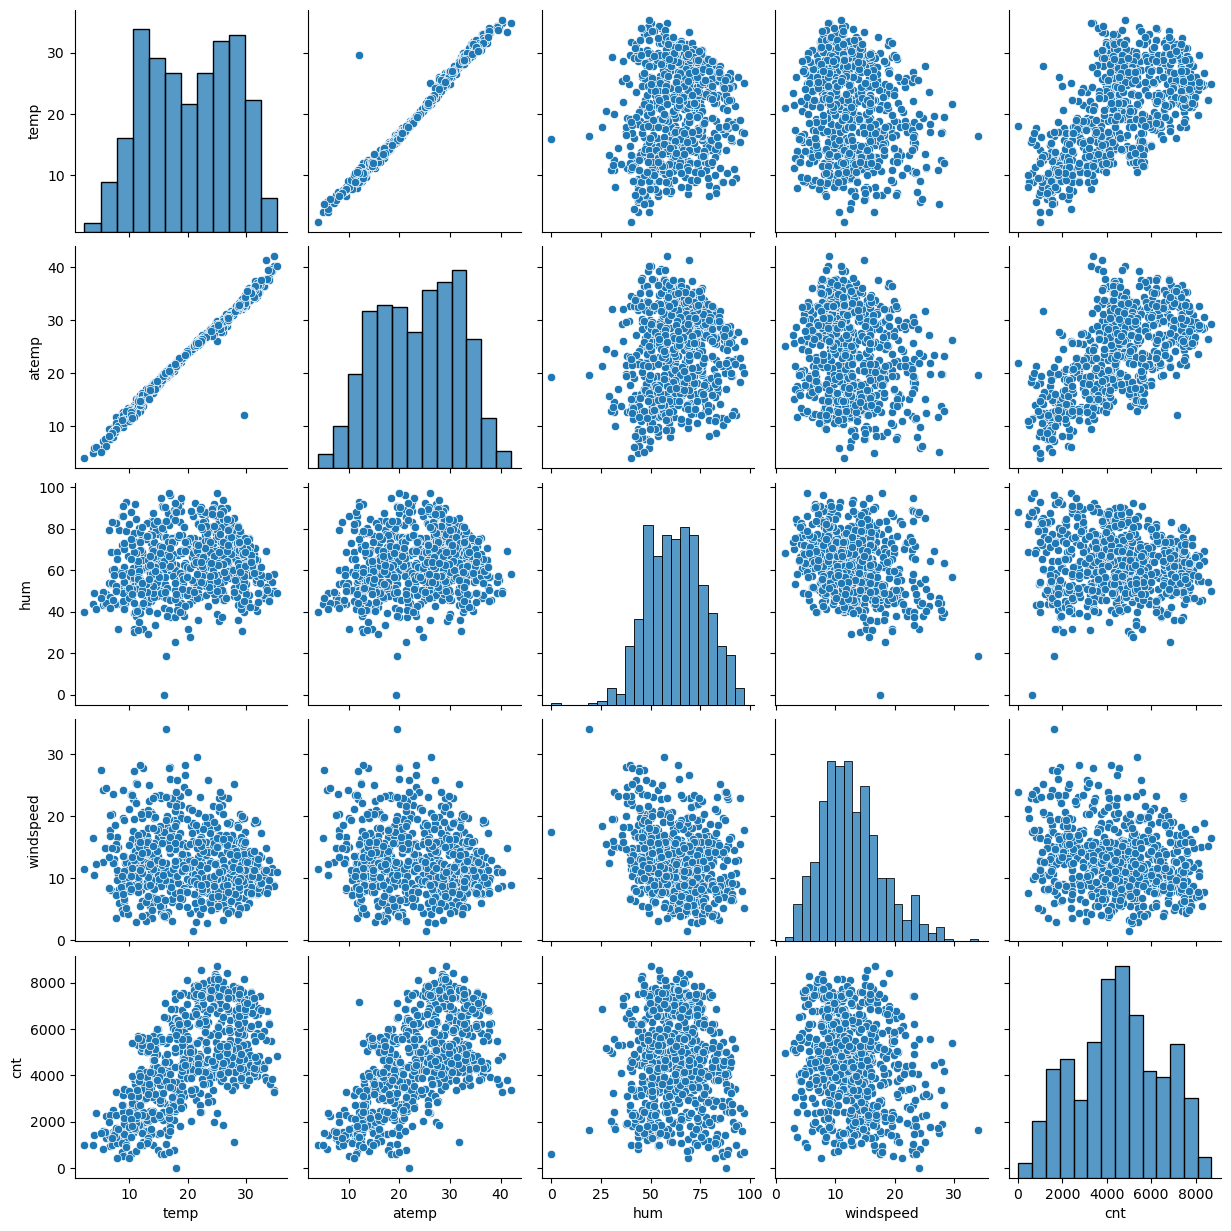

In [96]:
bikes_df_numeric = bikes_df[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bikes_df_numeric)
plt.show()

#### Observation from the PairPlot:

There is a multicollinearity in the dataset. we can see there is strong relationship between temp and atemp. 
one feature will be explained well by other feature so we use only temp for model building.

Some linear relationship is there between dependent and independent variable

#### Visualising Categorical Variables

 - As we might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.
 - **season, weathersit, mnth and weekday** have number representation so we will convert to **string label** for better readability and conversion in future

In [97]:
# Defining the map function for season
def season_map(x):
    return x.map({1: 'spring', 2: 'summer',3:'fall',4:'winter'})

# Applying the function to the season as season is categorical variable and it does not have any order with 1, 2 ,3 and 4
# so converting to string for further analysis and conversion

bikes_df[['season']] = bikes_df[['season']].apply(season_map)

In [98]:
# Defining the map function for month
def month_map(x):
    return x.map({1: 'January', 2: 'Fenruary',3:'March',4:'April', 5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

# Applying the function to the month as month is categorical variable
# so converting to string for further analysis and conversion

bikes_df[['mnth']] = bikes_df[['mnth']].apply(month_map)

In [99]:
# Defining the map function for weekday
def week_map(x):
    return x.map({0: 'Sunday', 1: 'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday', 5:'Friday',6:'Saturday'})

# Applying the function to the weekday as weekday is categorical variable
# so converting to string for further analysis and conversion

bikes_df[['weekday']] = bikes_df[['weekday']].apply(week_map)

In [100]:
# Defining the map function for weathersit
def weather_map(x):
    return x.map({1: 'Clear', 2: 'Mist',3:'Light Snow Or Rain'})

# Applying the function to the waether as weathersit is categorical variable and it does not have any order with 1, 2 ,3 and 4
# so converting to string for further analysis and conversion

bikes_df[['weathersit']] = bikes_df[['weathersit']].apply(weather_map)


In [101]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


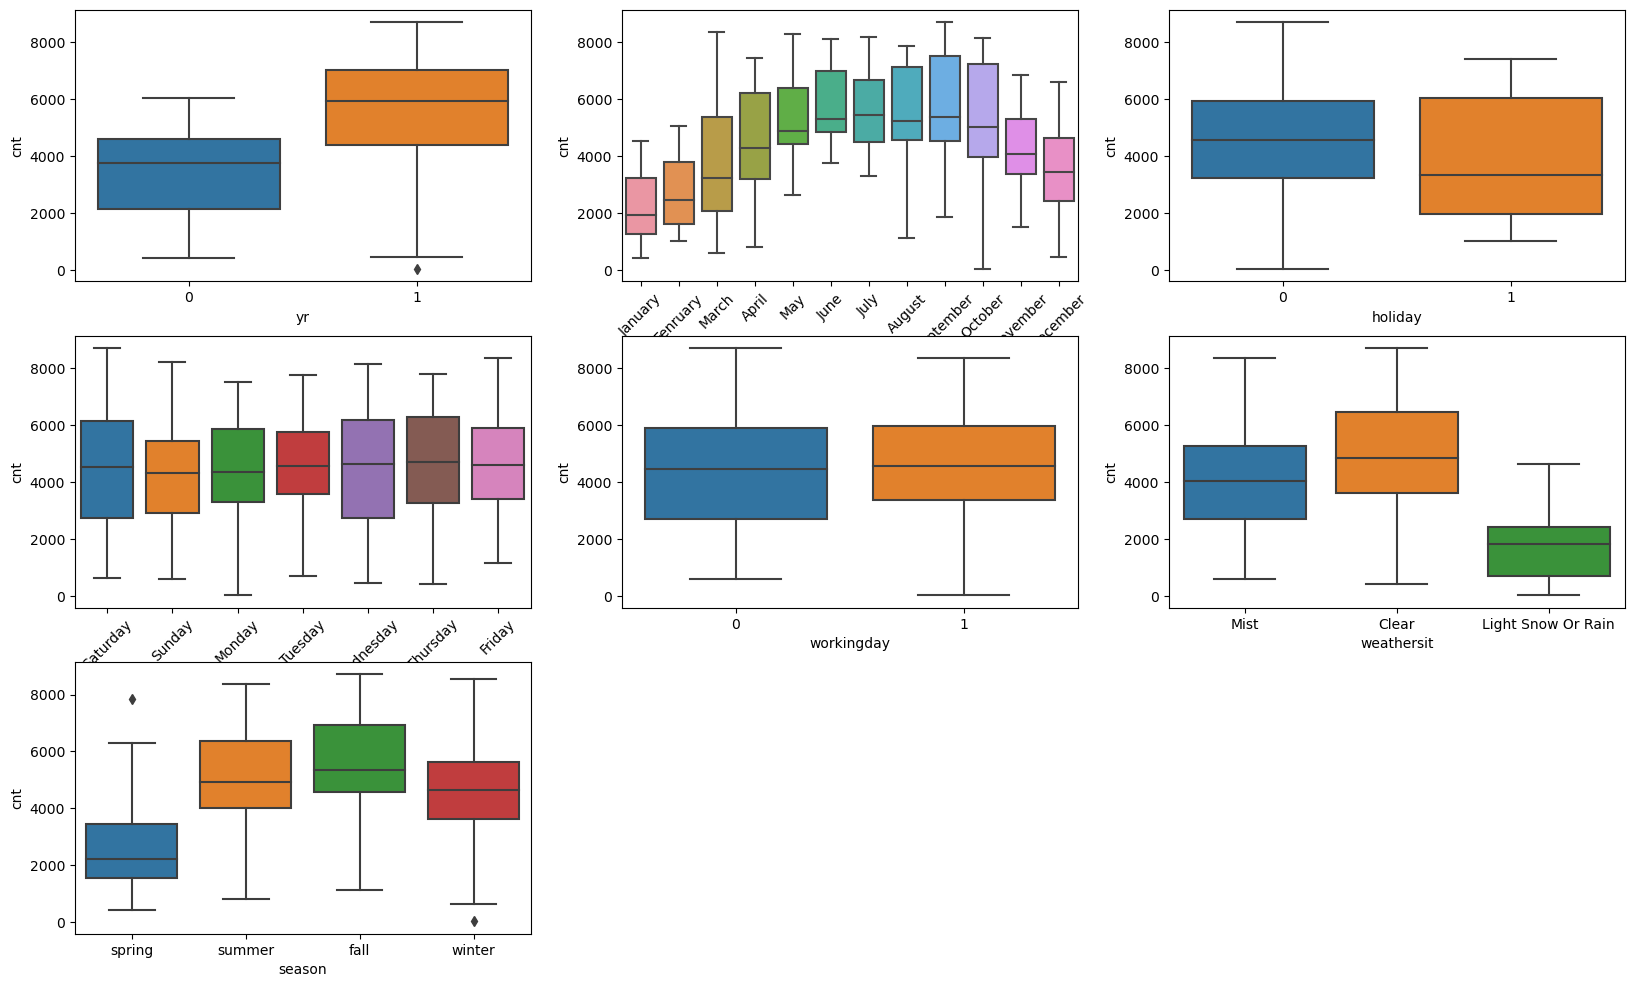

In [102]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_df)
plt.subplot(3,3,2)
mnthplot = sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df)
plt.subplot(3,3,4)
weekplot = sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df)
mnthplot.set_xticklabels(mnthplot.get_xticklabels(), rotation=45)
weekplot.set_xticklabels(weekplot.get_xticklabels(), rotation=45)
plt.show()

In [103]:
# holiday against weekday
pd.crosstab(bikes_df['holiday'],bikes_df['weekday'], dropna=False)

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
holiday,,,,,,,
0,102,90,105,105,102,103,102
1,2,15,0,0,2,1,1


In [104]:
#workingday against weekday
pd.crosstab(bikes_df['workingday'],bikes_df['weekday'], dropna=False)

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
workingday,,,,,,,
0,2,15,105,105,2,1,1
1,102,90,0,0,102,103,102


#### Observations from BoxPlot:
 - yr - Number of bikeusers increased in 2019 compare to 2018.
 - month - from March to October the cnt is increasing every month.
 - weekday - All the days are having same median and only the density varies. All days have demand for bikes
 - workingday and holiday - almost equal median. Both are highly correlated when the day is holiday and its not working day. We can see clearly from the crosstab.
 - Weathersit - when there is a clear weather number is bike users are high. it is less when there is snow/rain
 - season - summer and fall(April to October) has high number of users than winter than spring.

### Correlation

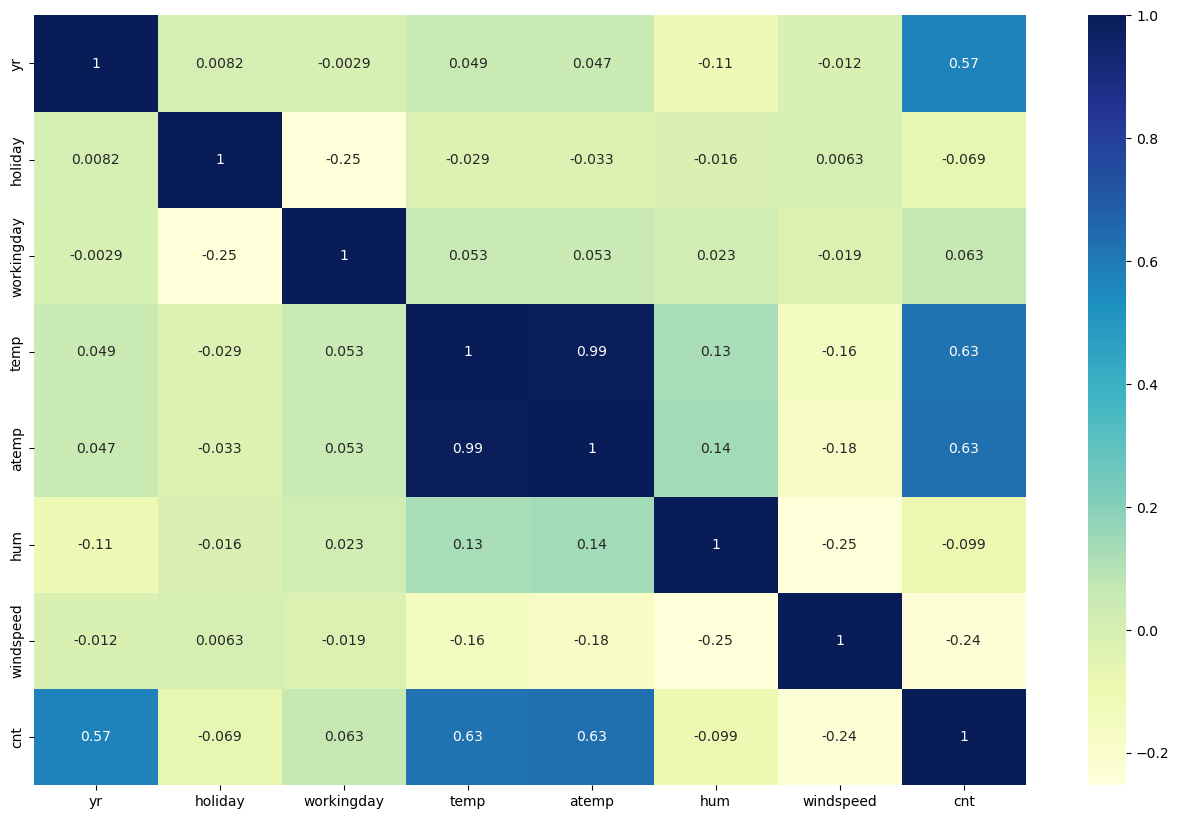

In [105]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bikes_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation:
 - temp and atemp is highly correlated and it is good to have either one feature for model building
 - Yr is also influencing the cnt
 - hum and windspeed has negative correlation

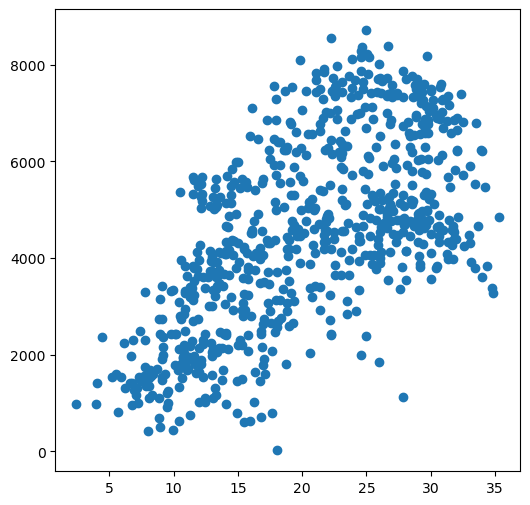

In [106]:
# We can plot some of the higly correlated variables against dependent variable
plt.figure(figsize=[6,6])
plt.scatter(bikes_df.temp, bikes_df.cnt)
plt.show()

## Step 3: Data Preparation

### Dummy Variables
 - We need to create a dummy variable for season, weathersit, mnth, weekday as it is a categorical variable. It will not be used directly for model building so need to convert it to dummy variables

In [107]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_df'
season_df = pd.get_dummies(bikes_df['season'], drop_first = True)
season_df.head(100)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
95,0,1,0
96,0,1,0
97,0,1,0
98,0,1,0


Now, we don't need four columns. we can drop the `fall` column, as the type of fall can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [108]:
# Add the results to the original bikes dataframe
bikes_df = pd.concat([bikes_df, season_df], axis = 1)

In [109]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'weathersit_df'
weathersit_df = pd.get_dummies(bikes_df['weathersit'], drop_first = True)
weathersit_df.head()

,Light Snow Or Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Now, we don't need three columns. we can drop the `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist` column, as the type of Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist can be identified with just the last two columns where — 
- `00` will correspond to `Clear, Few clouds, Partly cloudy`
- `01` will correspond to `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`
- `10` will correspond to `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`

In [110]:
# Add the results to the original bikes dataframe
bikes_df = pd.concat([bikes_df, weathersit_df], axis = 1)

In [111]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_df'
mnth_df = pd.get_dummies(bikes_df['mnth'], drop_first = True)
mnth_df.head()

,August,December,Fenruary,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [112]:
# Add the results to the original bikes dataframe
bikes_df = pd.concat([bikes_df, mnth_df], axis = 1)

In [113]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_df'
weekday_df = pd.get_dummies(bikes_df['weekday'], drop_first = True)
weekday_df.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [114]:
# Add the results to the original bikes dataframe
bikes_df = pd.concat([bikes_df, weekday_df], axis = 1)

In [115]:
# Drop the categorical variable for which dummy variables got created
bikes_df.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace = True)

In [116]:
bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting the Data into Training and Testing Sets
 - As we know, the first basic step for regression is performing a train-test split.

In [117]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Perform Scaling

As we know, scaling doesn't impact your model. Here we can see that except for cnt, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

    Min-Max scaling
    Standardisation (mean-0, sigma-1)

we will use MinMax scaling.

In [118]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'category' and 'dummy' variables
num_vars = ['temp', 'atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [119]:
# All the numerical variables fit between 0 and 1
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Divide data into dependent & Independent variables

In [120]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 4: Building a linear model & Evaluation

In [121]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [122]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light Snow Or Rain', True, 1),
 ('Mist', True, 1),
 ('August', False, 2),
 ('December', False, 2),
 ('Fenruary', False, 2),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', False, 2),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2)]

In [123]:
# list of columns we got as output from rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'winter', 'Light Snow Or Rain', 'Mist', 'January', 'September',
       'Saturday', 'Sunday'],
      dtype='object')

In [124]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [125]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lrm = sm.OLS(y_train,X_train_lm).fit()

#summary
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.39e-178
Time:                        18:42:46   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1811      0

In [126]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,51.66
3,temp,51.39
2,workingday,33.86
12,Saturday,8.36
13,Sunday,8.16
1,holiday,2.23
5,hum,1.88
9,Mist,1.56
10,January,1.44
7,winter,1.30


### Removing the high p-value variable

In [127]:
X_train_rfe1 = X_train_rfe.drop('atemp', 1,)

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe1)

# Running the linear model
lrm1 = sm.OLS(y_train,X_train_lm1).fit()

#summary
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.20e-179
Time:                        18:42:53   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1823      0

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [128]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,33.66
11,Saturday,8.31
12,Sunday,8.12
1,holiday,2.23
4,hum,1.87
3,temp,1.71
8,Mist,1.56
9,January,1.44
6,winter,1.29
7,Light Snow Or Rain,1.24


### Dropping the Variable and Updating the Model

In [129]:
X_train_rfe2 = X_train_rfe1.drop('holiday', 1,)

# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Running the linear model
lrm3 = sm.OLS(y_train,X_train_lm3).fit()

#summary
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.20e-179
Time:                        18:43:14   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1556      0

In [130]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.65
1,workingday,15.91
2,temp,10.80
10,Saturday,4.33
4,windspeed,4.28
11,Sunday,4.23
7,Mist,2.21
0,yr,2.07
5,winter,1.68
8,January,1.49


### Dropping the Variable and Updating the Model

In [131]:
X_train_rfe3 = X_train_rfe2.drop('hum', 1,)

# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Running the linear model
lrm4 = sm.OLS(y_train,X_train_lm4).fit()

#summary
print(lrm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.27e-178
Time:                        18:43:23   Log-Likelihood:                 477.28
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     498   BIC:                            -879.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0803      0

In [132]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,10.51
2,temp,8.47
3,windspeed,4.28
9,Saturday,3.18
10,Sunday,2.96
0,yr,2.06
6,Mist,1.57
4,winter,1.48
7,January,1.41
8,September,1.16


### Dropping the Variable and Updating the Model

In [133]:
X_train_rfe4 = X_train_rfe3.drop('Sunday', 1,)

# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Running the linear model
lrm5 = sm.OLS(y_train,X_train_lm5).fit()

#summary
print(lrm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.43e-178
Time:                        18:43:29   Log-Likelihood:                 475.05
No. Observations:                 510   AIC:                            -928.1
Df Residuals:                     499   BIC:                            -881.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1315      0

In [134]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
1,workingday,4.24
3,windspeed,3.45
0,yr,2.04
9,Saturday,1.74
6,Mist,1.54
4,winter,1.32
7,January,1.24
8,September,1.15
5,Light Snow Or Rain,1.08


In [135]:
lrm5.params

const                 0.131525
yr                    0.234507
workingday            0.057977
temp                  0.513606
windspeed            -0.153051
winter                0.089170
Light Snow Or Rain   -0.291144
Mist                 -0.075144
January              -0.081276
September             0.070713
Saturday              0.068198
dtype: float64

### Residual Analysis of the train data
 - So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [136]:
# making predictions on trained data
y_train_pred = lrm5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

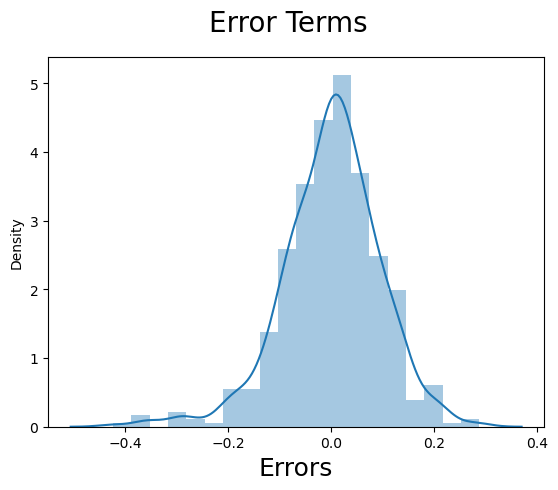

In [137]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Error Terms are not following any pattern

<Axes: >

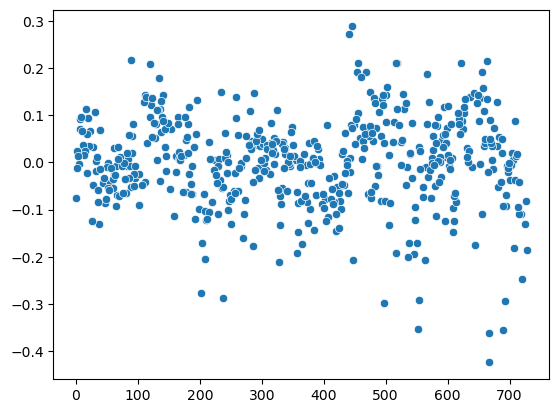

In [138]:
fig = plt.figure()
sns.scatterplot(y_train - y_train_pred)

### Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [139]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [140]:
y_test = df_test.pop('cnt')
X_test = df_test

In [141]:
X_train_lm5 = X_train_lm5.drop(["const"], axis = 1)

In [142]:
X_train_lm5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'winter', 'Light Snow Or Rain',
       'Mist', 'January', 'September', 'Saturday'],
      dtype='object')

In [143]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm5.columns]

In [144]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [145]:
# Making predictions
y_pred = lrm5.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

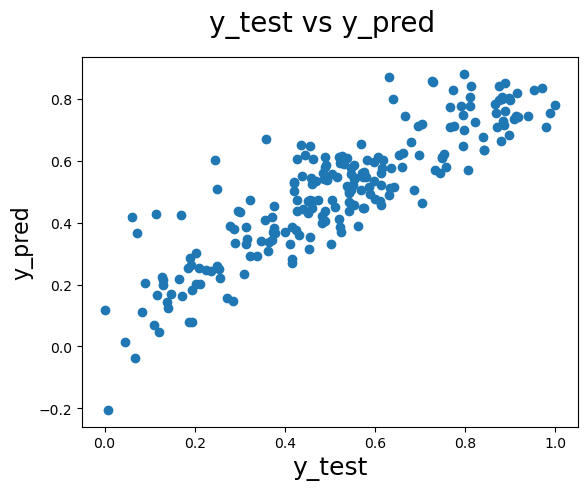

In [146]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### Assumptions Check

#### Linear Relationship
  - As per pair plot, and also below plot independent and dependent variable has linear relationship

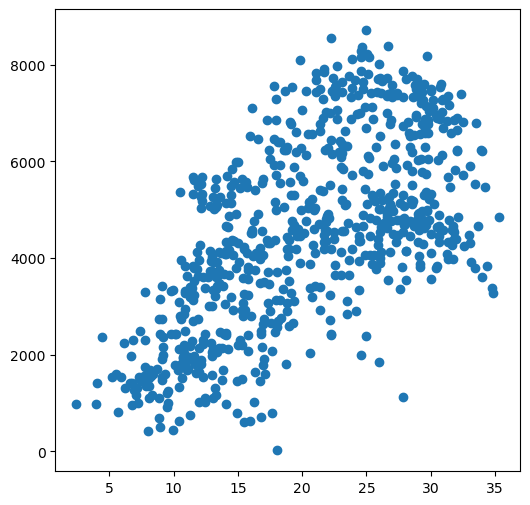

In [147]:
# We can plot some of the higly correlated variables against dependent variable
plt.figure(figsize=[6,6])
plt.scatter(bikes_df.temp, bikes_df.cnt)
plt.show()

#### As per VIF check there is no multicolinearity between predictor variables

Features	VIF	
2	temp	4.99
1	workingday	4.24
3	windspeed	3.45
0	yr	2.04
9	Saturday	1.74
6	Mist	1.54
4	winter	1.32
7	January	1.24
8	September	1.15
5	Light Snow Or Rain	1.08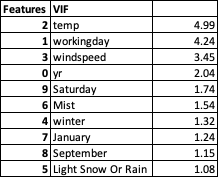

#### Error terms are normally distributed with mean zero
 - We can check that in the residual analysis

### R^2 Value for Train and Test

In [148]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
train_r2

0.8194778264779179

In [149]:
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_pred)
test_r2

0.761993453892621

#### Observation:
 **This model is a generalised one as we can see the difference of R2 between test and train dataset is within 5**

### Adjusted R^2 Value for Train and Test

In [150]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-train_r2)*(n-1)/(n-p-1)
adjusted_r2_train

0.8085712784942921

In [151]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-test_r2)*(n-1)/(n-p-1)
adjusted_r2_test

0.7254739309449278

### Final Model

In [152]:
# The linear regression model 5(lrm5) is the final model for prediction
lrm5.params

const                 0.131525
yr                    0.234507
workingday            0.057977
temp                  0.513606
windspeed            -0.153051
winter                0.089170
Light Snow Or Rain   -0.291144
Mist                 -0.075144
January              -0.081276
September             0.070713
Saturday              0.068198
dtype: float64

### Best Fitted Line Equation is 

**cnt = 0.513606 * temp - 0.291144 * Light Snow Or Rain(weathersit no 3) + 0.234507 * yr - 0.153051 * windspeed
      + 0.089170 * winter - 0.081276 * January -0.075144 *  Mist + 0.070713 * September + 0.068198 * Saturday 
      + 0.057977* workingday + 0.131525**
      